In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.shape

(10000, 6)

In [8]:
df.size

60000

In [9]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

# EDA

In [10]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

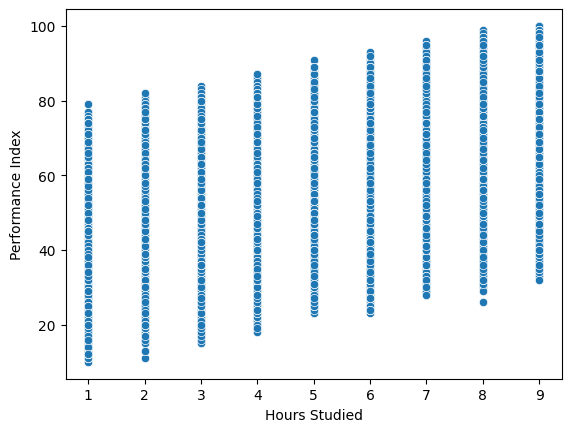

In [11]:
sns.scatterplot(data=df,x='Hours Studied',y='Performance Index')

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

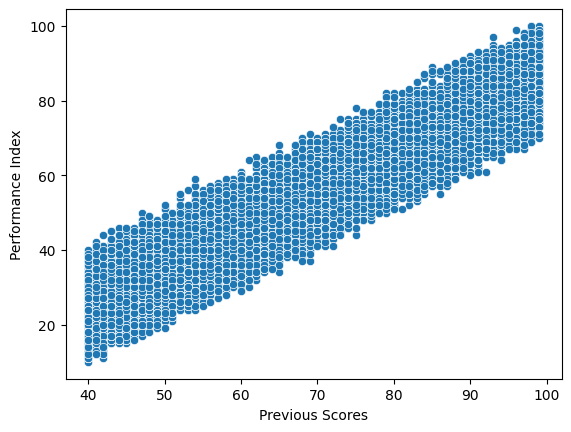

In [12]:
sns.scatterplot(data=df,x='Previous Scores',y='Performance Index')

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

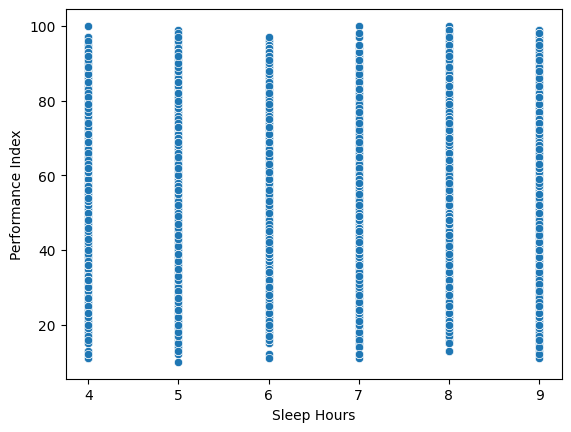

In [13]:
sns.scatterplot(data=df,x='Sleep Hours',y='Performance Index')

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

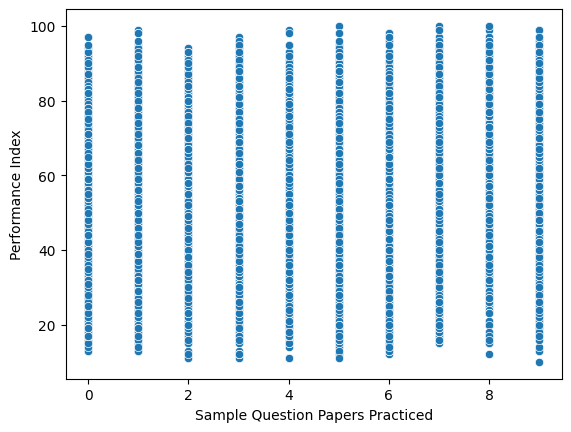

In [14]:
sns.scatterplot(data=df,x='Sample Question Papers Practiced',y='Performance Index')

<Axes: xlabel='Sleep Hours', ylabel='Count'>

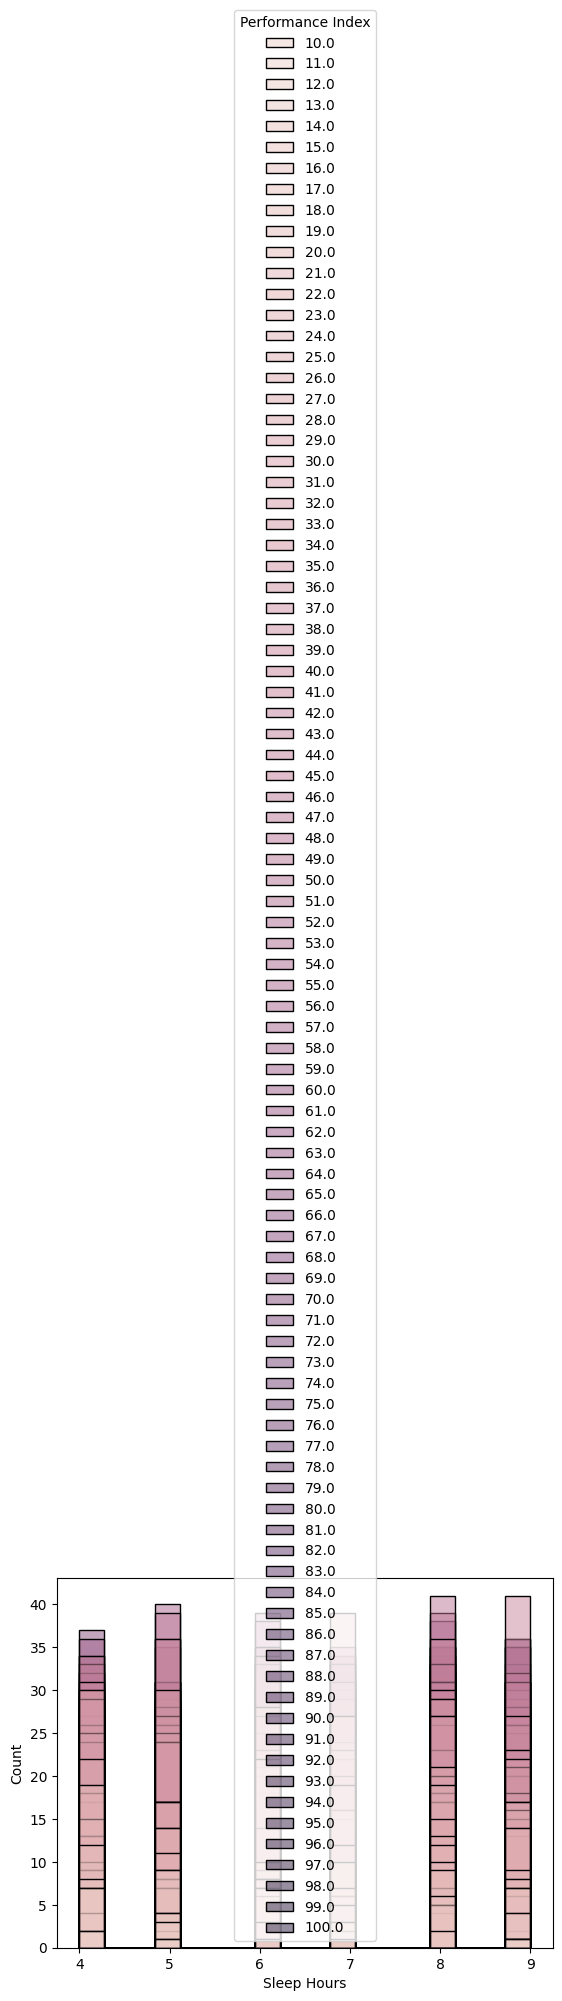

In [15]:
sns.histplot(data=df,x='Sleep Hours',hue='Performance Index')

<Axes: ylabel='Density'>

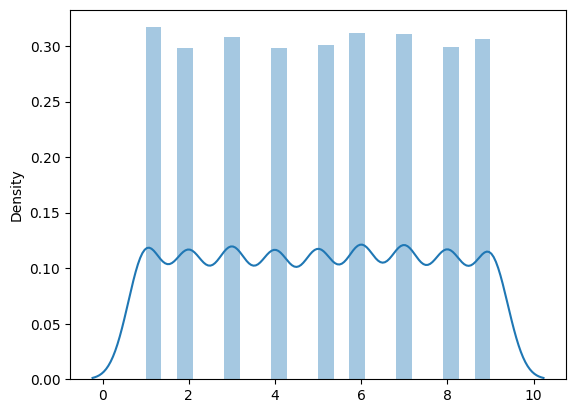

In [16]:
sns.distplot(x=df['Hours Studied'])

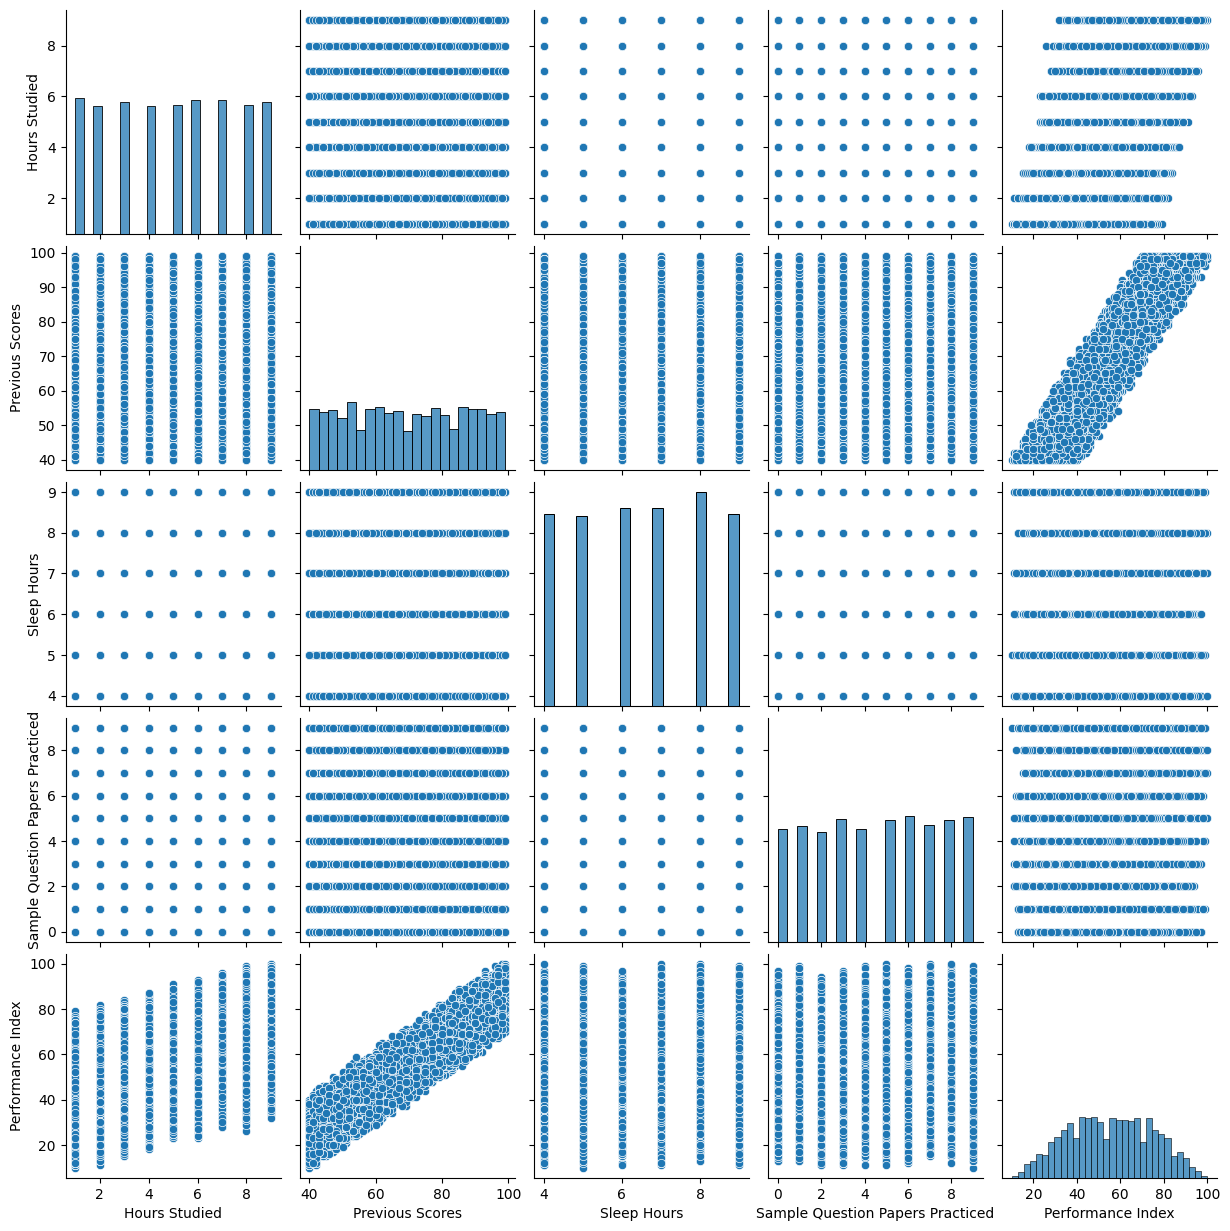

In [17]:
sns.pairplot(df)

# Outliers

In [18]:
df.duplicated().sum()

np.int64(127)

<Axes: xlabel='Hours Studied'>

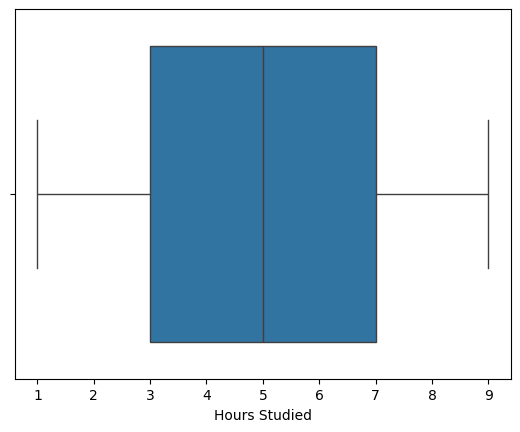

In [19]:
sns.boxplot(x=df['Hours Studied'])

<Axes: xlabel='Previous Scores'>

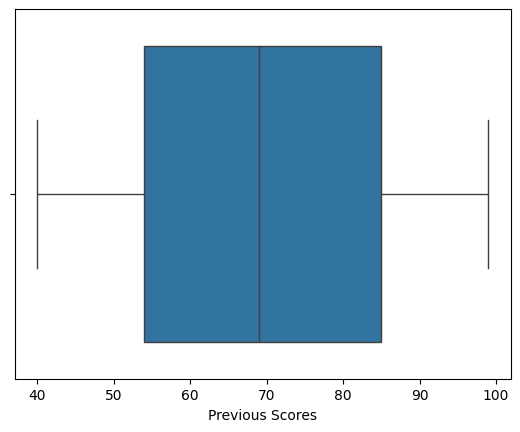

In [20]:
sns.boxplot(x=df['Previous Scores'])

<Axes: xlabel='Sleep Hours'>

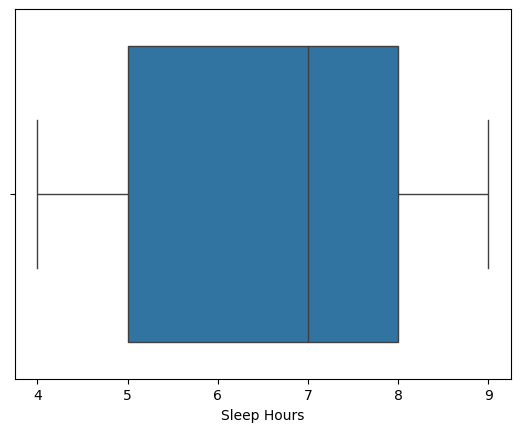

In [21]:
sns.boxplot(x=df['Sleep Hours'])

<Axes: xlabel='Sample Question Papers Practiced'>

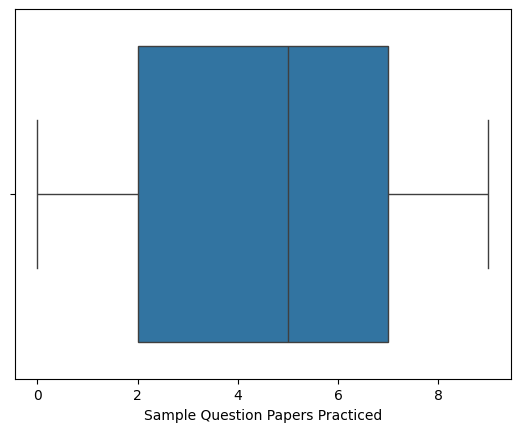

In [22]:
sns.boxplot(x=df['Sample Question Papers Practiced'])

<Axes: xlabel='Performance Index'>

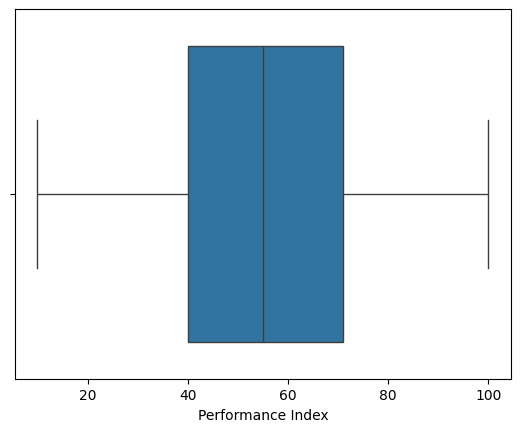

In [23]:
sns.boxplot(x=df['Performance Index'])

* There is no outlier present in this

# Feature selection

In [24]:
df.drop("Extracurricular Activities", axis=1).corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

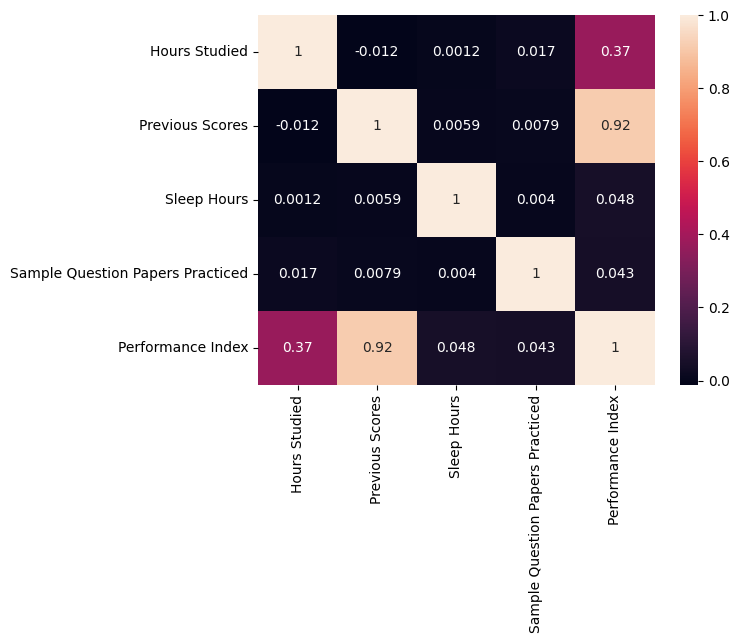

In [25]:
sns.heatmap(df.drop('Extracurricular Activities',axis=1).corr(),annot=True)

In [26]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

# Model building

In [27]:
x=df.drop('Extracurricular Activities',axis=1)

In [28]:
y=df['Performance Index']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.25)

In [30]:
x_test.shape

(2500, 5)

In [31]:
x_train.shape

(7500, 5)

In [32]:
y_train.shape

(7500,)

In [33]:
y_test.shape

(2500,)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
y_pred_rf = rf.predict(x_test)

In [37]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

In [38]:
print("Random Forest R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Random Forest R² Score: 0.9999999752604923
MAE: 0.00021599999999999682
MSE: 9.039999999999756e-06
RMSE: 0.003006659275674541
